In [150]:
import numpy as np
from pathlib import Path
import pandas as pd
import shutil
import IPython.display as ipd
from PIL import Image

In [2]:
blacklist = ["fma_small/fma_small/108/108925.mp3","fma_small/fma_small\099\099134.mp3","fma_small/fma_small\133\133297.mp3"]

In [82]:
df = pd.read_csv("../csvs/samplespace.csv")

<AxesSubplot:ylabel='track_genre_top'>

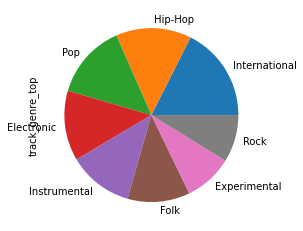

In [83]:
df['track_genre_top'].value_counts().plot.pie()

In [86]:
df.loc[df.artist_name=='Mastermind XS', "artist_id"] = 9169

In [122]:
sample_lt10 = df.groupby('artist_id').sample(n=6,random_state=1)

In [123]:
val = pd.concat([df,sample_lt10]).drop_duplicates(keep=False)

In [152]:
# val[val.artist_id == 127]
# ipd.display(val[val.artist_id == 127])
# ipd.display(sample_lt10[sample_lt10.artist_id == 127])

In [182]:
sample_lt10

,track_id,artist_name,artist_id,track_title,track_genre_top
148,7385,Lucky Dragons,10,my imaginary scary home,Experimental
204,11019,Lucky Dragons,10,Mirror Friends,Experimental
24,1075,Lucky Dragons,10,Painful Corazon,Experimental
149,7386,Lucky Dragons,10,its hard to wake up,Experimental
256,14690,Lucky Dragons,10,Givers,Experimental
...,...,...,...,...,...
3383,152254,Panda Dub,23946,Mayd Hubb meets Joe Pilgrim - Tribute to Yabby...,International
3384,152258,Panda Dub,23946,Purple Trip,International
3385,152261,Panda Dub,23946,Danse Macabre,International
3386,152262,Panda Dub,23946,Die Brücke,International


In [229]:
train_file_list = sample_lt10.track_id.to_list()
y_train  = sample_lt10.artist_id.to_numpy()

test_file_list = val.track_id.to_list()
y_test = val.artist_id.to_numpy()

In [231]:
print(len(train_file_list), len(test_file_list), len(y_train), len(y_test))

2124 1276 2124 1276


In [232]:
train_file_list = ["%06.0f" % x for x in train_file_list] # to have evenly padded 6 digit nos
test_file_list = ["%06.0f" % x for x in test_file_list]

In [ ]:
# train_file_list

In [233]:
source_dir = "../precalculated_files_mel/fma_single/"
# dest_dir = "../precalculated_files_mel/samplespace/"

x_train = np.zeros((len(train_file_list),369,496,1))

x_test = np.zeros((len(test_file_list),369,496,1))

for ind,file_stem in enumerate(train_file_list):
    src = Image.open(source_dir+file_stem+".png").convert('L')
    src = np.expand_dims(src,-1)/255
    x_train[ind] = src

print("Done training samples")

for ind,file_stem in enumerate(test_file_list):
    src = Image.open(source_dir+file_stem+".png").convert('L')
    src = np.expand_dims(src,-1)/255
    x_test[ind] = src
    
print("Done test sampels")

Done training samples
Done test sampels


In [235]:
x_test.shape

(1276, 369, 496, 1)

In [236]:
np.save("x_train", x_train)
np.save("y_train",y_train)

In [237]:
np.save("x_test",x_test)
np.save("y_test",y_test)

In [241]:
val = np.load("x_train.npy")

In [242]:
val.shape

(2124, 369, 496, 1)